# 데이터 이해
1. 언제, 어디에서, 왜 데이터를 취득했는가?
2. 데이터는 어느 정도 간격을 두고 취득했는가?
3. 데이터는 무엇을 의미하고 있는가?
4. 데이터를 취득할 때 빠진 사항은 없었는가? 완성되어 있는가?
5. 데이터에 결손값과 범위 외의 값이 포함되어 있는가?
6. 데이터의 항목 간에 관련성은 있는가?

## 데이터 읽기와 확인

In [2]:
import pandas as pd

bank_df=pd.read_csv('C:/Users/victo/Downloads/chap3_4_6_7_A1-5/chap3-4/data/bank.csv',sep=',')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


### 연습문제1
- bank_df의 끝에서 10행까지 표시하세요.

In [3]:
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [5]:
# 데이터 행 수, 열 수 확인
print(bank_df.shape)

# 데이터형 확인
print(bank_df.dtypes)

(7234, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


## 결측치 확인
- axis=1: 행
- axis=0: 열

In [7]:
# 결측치 유무 확인
print(bank_df.isnull().any(axis=1))
print(bank_df.isnull().any(axis=0))

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


In [9]:
# 결측치 개수 확인
print(bank_df.isnull().sum(axis=1))
print(bank_df.isnull().sum(axis=0))

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


### 연습문제2
- 결측값의 개수가 많은 순서로 정렬해보세요.

In [15]:
print(bank_df.isnull().sum(axis=0).sort_values(ascending=False))
print(bank_df.isnull().sum(axis=1).sort_values(ascending=False))

poutcome     5900
contact      2038
education     273
job            44
month           0
previous        0
pdays           0
campaign        0
duration        0
age             0
day             0
loan            0
housing         0
balance         0
default         0
marital         0
y               0
dtype: int64
139     4
1762    4
1670    4
1814    4
1904    4
       ..
4667    0
4669    0
6038    0
6037    0
4047    0
Length: 7234, dtype: int64


## 통계량 계산


In [10]:
# 수치형 변수들의 통계량 계산
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


- 중앙값과 평균값 차이가 큰 컬럼들에 대한 조사 필요!(balance, pdays)

### 연습문제3
- 데이터형이 문자열(object)인 항목에 대해서 각종 통계값을 계산하세요.

In [17]:
bank_df.describe(include=[object])
# include=[object] 조건을 넣으면 문자열에 대해서도 통계값을 계산할 수 있다!!!

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


## 데이터 시각화

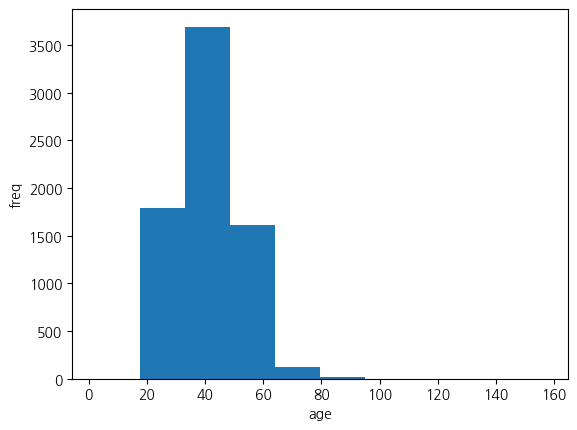

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(bank_df.age)
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

### 연습문제4
- 그 밖의 수치 항목들에 대해 각각 히스토그램을 작성하고 데이터 분포를 확인하세요.

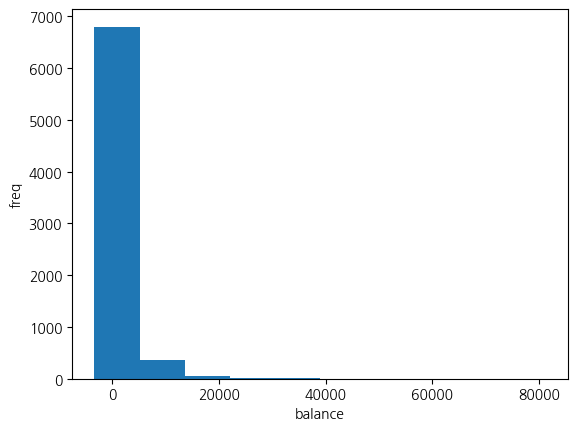

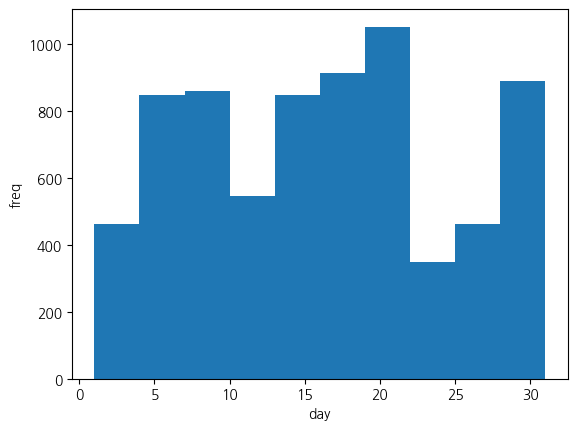

In [22]:
plt.hist(bank_df.balance)
plt.xlabel('balance')
plt.ylabel('freq')
plt.show()

plt.hist(bank_df.day)
plt.xlabel('day')
plt.ylabel('freq')
plt.show()
# 그 외 동일하게

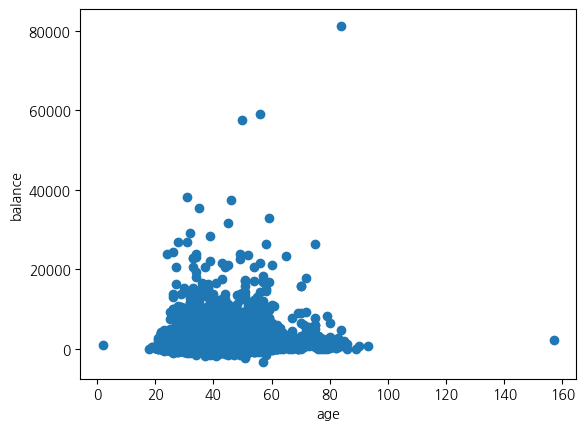

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [24]:
# 산포도 작성
plt.scatter(bank_df.age,bank_df.balance)
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

bank_df[['age','balance']].corr()

- 상관계수 0.112364 로 무관계에 가깝다
- 상관관계, 인과관계 구별이 필요하다.
- 공선성에 대한 경계가 필요하다.

### 연습문제5
- age, balance, day, duration에 대해서 산포도 행렬을 작성하고 두 가지 항목의 관계성을 확인하세요.

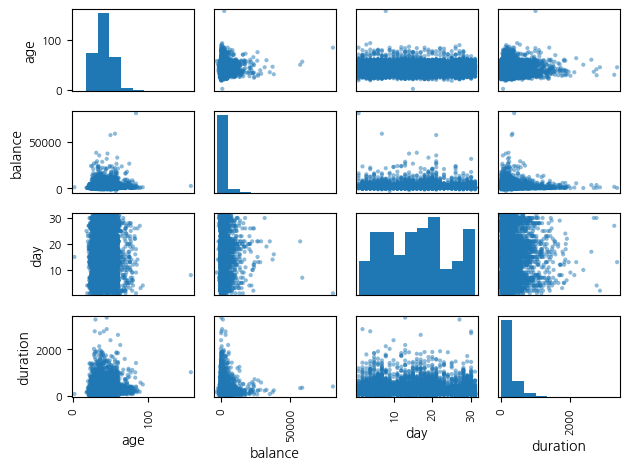

In [26]:
pd.plotting.scatter_matrix(bank_df[['age','balance','day','duration']])         # 산포도를 하나씩 작성하면 매우 번거롭다! 산포도 행렬로 아래와 같이 작성하자ㅎㅎ
plt.tight_layout()
plt.show()


management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


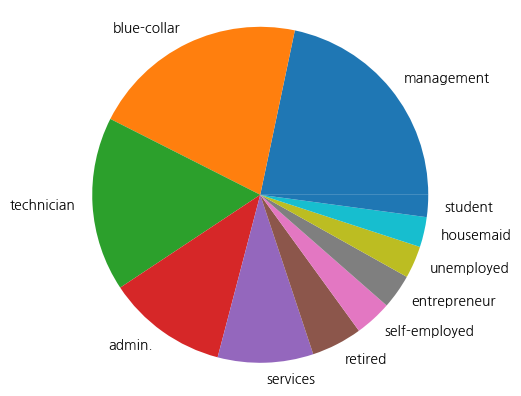

In [33]:
# 문자열 항목 원 그래프로 나타내기
print(bank_df.job.value_counts(ascending=False,normalize=True))         # 총 발생횟수가 1이 되도록 정규화

job_label=bank_df['job'].value_counts(ascending=False,normalize=True).index
job_val=bank_df['job'].value_counts(ascending=False,normalize=True).values

plt.pie(job_val,labels=job_label)
plt.axis('equal')           # 완벽한 원이 되도록 가로세로 비율을 동일하게 고정
plt.show()

### 연습문제6
- 다른 문자열 항목도 마찬가지로 각 항목의 값별로 비율과 원 그래프를 작성하고 데이터 분포를 확인하세요.

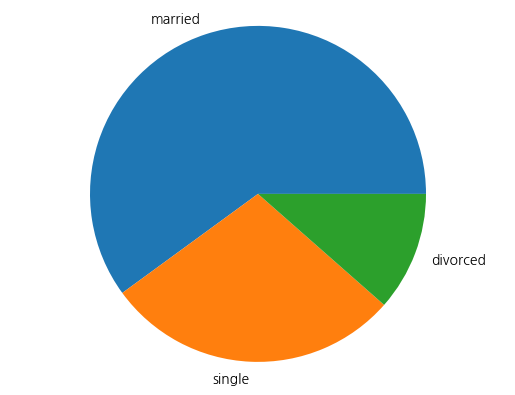

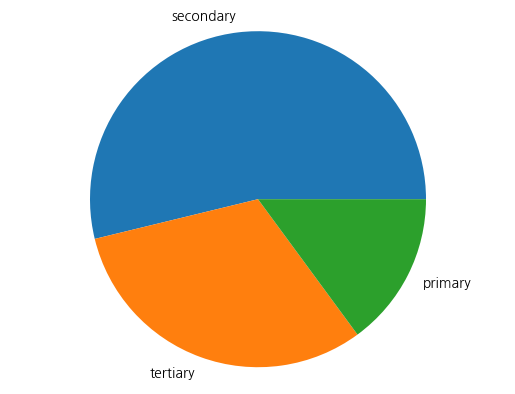

In [37]:
marital_index=bank_df.marital.value_counts(ascending=False,normalize=True).index
marital_val=bank_df.marital.value_counts(ascending=False,normalize=True).values

plt.pie(marital_val,labels=marital_index)
plt.axis('equal')
plt.show()

edu_index=bank_df.education.value_counts(ascending=False,normalize=True).index
edu_val=bank_df.education.value_counts(ascending=False,normalize=True).values

plt.pie(edu_val,labels=edu_index)
plt.axis('equal')
plt.show()

In [ ]:
#미완성
list=['marital','education','default','housing','contact','month','poutcome']

for i in list:
    index=bank_df.i.value_counts(ascending=False,normalize=True).index
    val=bank_df.i.value_counts(ascending=False,normalize=True).values
    plt.pie(val,labels=index)
    plt.axis('equal')
    plt.show()

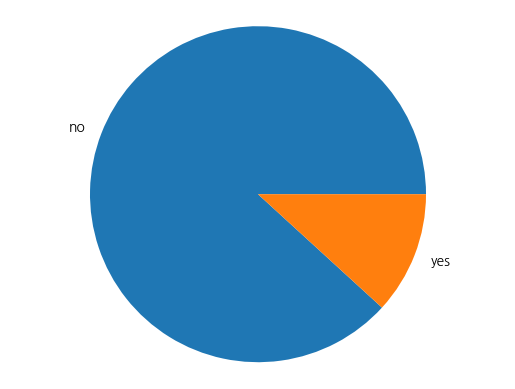

In [38]:
# y의 원 그래프 작성 및 데이터 분포 확인
y_labels=bank_df.y.value_counts(ascending=False,normalize=True).index
y_val=bank_df.y.value_counts(ascending=False,normalize=True).values

plt.pie(y_val,labels=y_labels)
plt.axis('equal')
plt.show()

- no가 yes보다 압도적으로 많으므로 불균형한 데이터
- 모델 작성에는 균형 잡힌 데이터가 인상적임! 이대로 사용하면 문제 생김